In [2]:
import pandas as pd
import zipfile
#from io import Bytes IO

In [3]:
import zipfile
import pandas as pd
 
# read the dataset using the compression zip
df = pd.read_csv('Linear Regression Practical Example (Part 1) Dataset.zip',compression='zip')
 
# display dataset
print(df.head(2))

           Brand   Price   Body  Mileage  EngineV Engine Type Registration  \
0            BMW  4200.0  sedan      277      2.0      Petrol          yes   
1  Mercedes-Benz  7900.0    van      427      2.9      Diesel          yes   

   Year         Model  
0  1991           320  
1  1999  Sprinter 212  


In [4]:
df1 = pd.DataFrame(df)
df1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [1]:
import numpy as np
#import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

C:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
pip install Numpy==1.23.5


  Attempting uninstall: Numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\anaconda\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



# preprocessing the data

In [7]:
df1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


# Determining the variables of interest

In [21]:
df1 = df1.drop(['Model'],axis=1)

df1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Dealing with missing values

In [22]:
df1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [24]:
df2 = df1.dropna(axis=0)
df2.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [25]:
df2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# exploring visualisations

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

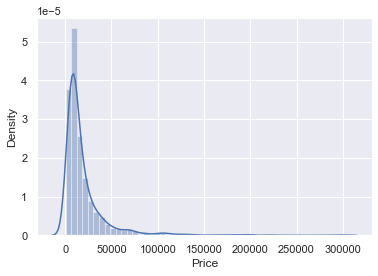

In [27]:
sns.distplot(df2['Price'])

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

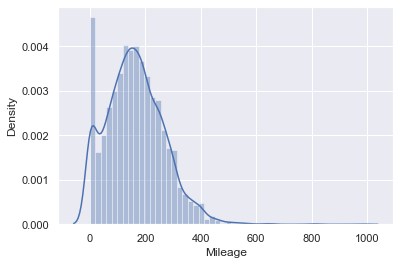

In [28]:
sns.distplot(df2['Mileage'])

In [31]:
q = df2['Mileage'].quantile(0.99)
df3 = df2[df2['Mileage']<q]

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

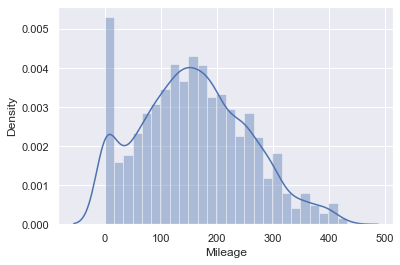

In [32]:
sns.distplot(df3['Mileage'])

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

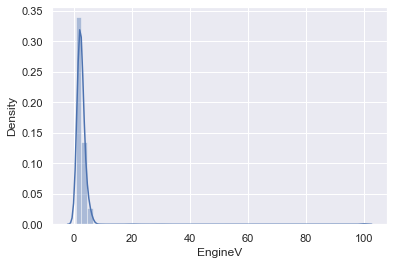

In [33]:
sns.distplot(df2['EngineV'])

In [35]:
df3 = df2[df2['EngineV']<6.5]

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

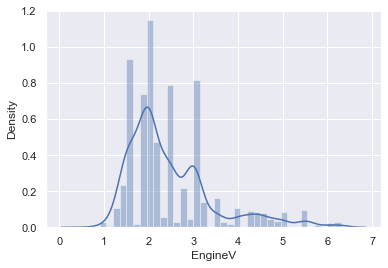

In [36]:
sns.distplot(df3['EngineV'])

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

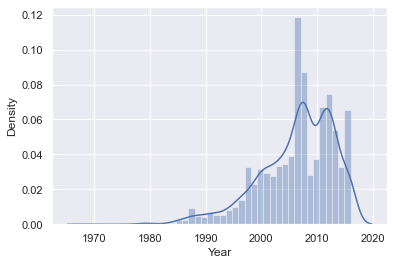

In [37]:
sns.distplot(df2['Year'])

In [40]:
q = df3['Year'].quantile(0.01)
df4 = df3[df3['Year']>q]

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

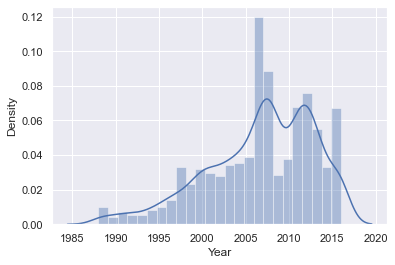

In [41]:
sns.distplot(df4['Year'])

In [42]:
data_cleaned = df4.reset_index(drop=True)

In [43]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3946,3946.000000,3946,3946.000000,3946.000000,3946,3946,3946.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,861,NaN,1488,NaN,NaN,1843,3581,NaN
mean,NaN,19847.091766,NaN,162.542575,2.474083,NaN,NaN,2006.705525
std,NaN,25973.518631,NaN,103.009711,0.976992,NaN,NaN,6.199632
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000



# Checking the OLS assumptions

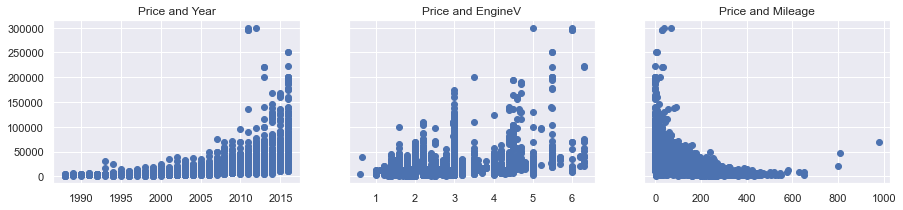

In [44]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

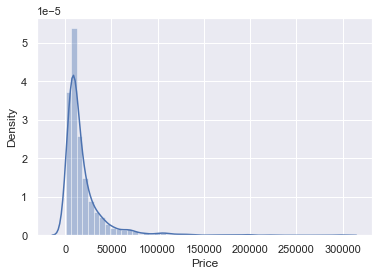

In [45]:
sns.distplot(data_cleaned['Price'])

In [46]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3941,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3942,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3943,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3944,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


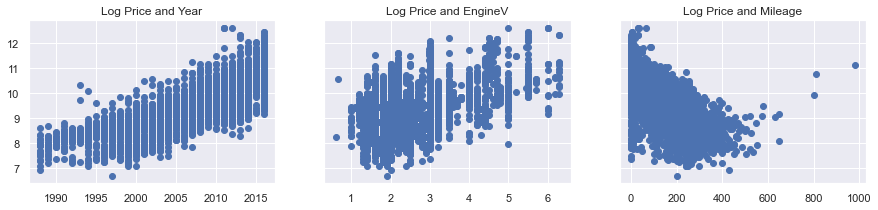

In [47]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [48]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

# Multicollinearity

In [49]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [50]:
from statsmoCreate dummy variablesdels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [51]:
vif

,VIF,features
0,3.468857,Mileage
1,10.088472,Year
2,7.420555,EngineV


In [52]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

# Create dummy variables

In [53]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [54]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [55]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [56]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [57]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear regression model

chosing my inputs and output(X,y)

In [58]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

# Scale the data

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [60]:
inputs_scaled = scaler.transform(inputs)

# Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [73]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params, cv=5)
ridge_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]})

In [65]:
lasso_params = {'alpha': [0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params, cv=5)
lasso_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10, 100]})

In [67]:
best_ridge_model = ridge_grid.best_estimator_
best_lasso_model = lasso_grid.best_estimator_

ridge_score = best_ridge_model.score(x_test, y_test)
lasso_score = best_lasso_model.score(x_test, y_test)

In [70]:
print(ridge_score)
print(lasso_score)

0.7403001117561907
0.6193058210081124


In [84]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [85]:
y_hat = reg.predict(x_train)

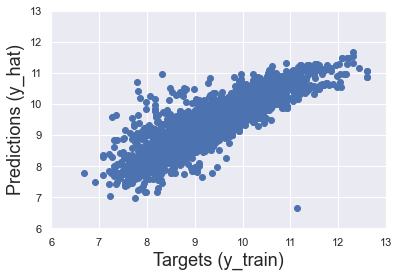

In [86]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

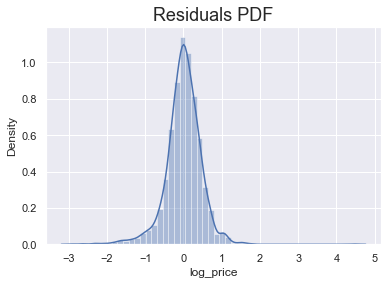

In [87]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [88]:
reg.score(x_train,y_train)

0.7413746071554278

In [89]:
reg.score(x_test,y_test)

0.7403368267288217

# Finding the weights and bias

In [90]:
reg.intercept_

9.43158031884159

In [91]:
reg.coef_

array([-0.47036653,  0.2450589 ,  0.02516684,  0.03778492, -0.1276864 ,
       -0.1675706 , -0.04642295, -0.08367983, -0.14603206, -0.09366301,
       -0.20028912, -0.12182503, -0.15775095, -0.13353477, -0.0341752 ,
       -0.13690759,  0.31836359])

In [93]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.470367
1,EngineV,0.245059
2,Brand_BMW,0.025167
3,Brand_Mercedes-Benz,0.037785
4,Brand_Mitsubishi,-0.127686
5,Brand_Renault,-0.167571
6,Brand_Toyota,-0.046423
7,Brand_Volkswagen,-0.083680
8,Body_hatch,-0.146032
9,Body_other,-0.093663


In [94]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# Testing

In [95]:
y_hat_test = reg.predict(x_test)

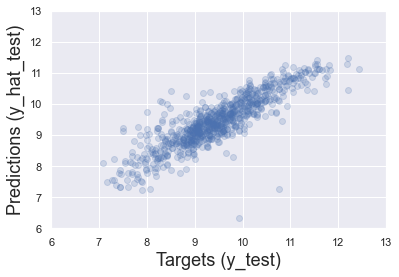

In [96]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [97]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10592.796354
1,9772.840253
2,19661.408454
3,34132.180084
4,16020.888528


In [98]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10592.796354,NaN
1,9772.840253,7900.0
2,19661.408454,NaN
3,34132.180084,NaN
4,16020.888528,NaN
...,...,...
785,34548.889957,NaN
786,16122.177814,NaN
787,26505.285865,NaN
788,49430.009949,NaN


In [99]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.099409
1    10.021271
2     9.210240
3    10.292146
4     8.881836
Name: log_price, dtype: float64

In [100]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10592.796354,8950.0
1,9772.840253,22500.0
2,19661.408454,9999.0
3,34132.180084,29500.0
4,16020.888528,7200.0
...,...,...
785,34548.889957,41000.0
786,16122.177814,11500.0
787,26505.285865,44700.0
788,49430.009949,39900.0


In [101]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [102]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10592.796354,8950.0,-1642.796354,18.355267
1,9772.840253,22500.0,12727.159747,56.565154
2,19661.408454,9999.0,-9662.408454,96.633748
3,34132.180084,29500.0,-4632.180084,15.702305
4,16020.888528,7200.0,-8820.888528,122.512341
...,...,...,...,...
785,34548.889957,41000.0,6451.110043,15.734415
786,16122.177814,11500.0,-4622.177814,40.192851
787,26505.285865,44700.0,18194.714135,40.704058
788,49430.009949,39900.0,-9530.009949,23.884737


In [103]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,790.000000,790.000000,790.000000,790.000000
mean,17484.526101,20418.721671,2934.195570,37.080659
std,15432.629876,25352.025148,14986.950691,55.241227
min,560.937243,1200.000000,-27832.503866,0.127160
25%,7655.709242,7362.500000,-2254.914590,12.457408
50%,12221.451414,12300.000000,345.932100,24.792053
75%,21881.915201,23475.000000,3994.112327,41.469837
max,95585.314028,250000.000000,182074.151661,562.272805


In [104]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
507,9887.41,9900.00,12.59,0.13
256,3784.45,3800.00,15.55,0.41
759,3717.92,3700.00,-17.92,0.48
773,3971.78,4000.00,28.22,0.71
59,11394.33,11500.00,105.67,0.92
599,12877.05,12999.00,121.95,0.94
544,7127.94,7200.00,72.06,1.00
735,28570.68,28900.00,329.32,1.14
445,5729.06,5800.00,70.94,1.22
655,7502.88,7400.00,-102.88,1.39
